# Forced Kuramoto

The equations for a (forced) complex network of $N$ Kuramoto oscillators with natural frequencies $\omega_k$, adjacency matrix $A$, coupling strength (or average coupling strength, for the case where $A$ is weighted) $\lambda$ and a forced term of type $ F_i \cos{(\Omega t - \theta)} $ that acts on a fraction $f = N_F/N$, where $N_F$ is the number of forced oscillators (nonzero $F$), can be written as:

$$ \dot{\theta}_i = \omega_i + \lambda \sum_{j=1}^N A_{ij} \sin{(\theta_j - \theta_i)} + F_i \sin{(\Omega t - \theta_i)} $$

which gives the Jacobian:

$$ J_{ij} = \frac{\partial \dot{\theta}_i}{\partial \theta_j} = A_{ij} \cos{(\theta_j - \theta_i)} - \delta_{ij} F_i \cos{(\Omega t - \theta_i)} $$

If we measure the phase from a reference frame rotating with the forced frequency $\Omega$, i.e., make the change of variables $\phi_i = \theta_i - \Omega t$, we find:

$$ \dot{\phi}_i = \omega_i - \Omega + \lambda \sum_{j=1}^N A_{ij} \sin{(\phi_j - \phi_i)} - F_i \sin{(\phi_i)} $$

with Jacobian:

$$ J_{ij} = \frac{\partial \dot{\phi}_i}{\partial \phi_j} = A_{ij} \cos{(\phi_j - \phi_i)} - \delta_{ij} F_i \cos{(\phi_i)} $$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
from NetworkFunctions import *
from NetworkClasses import *

### Define the network

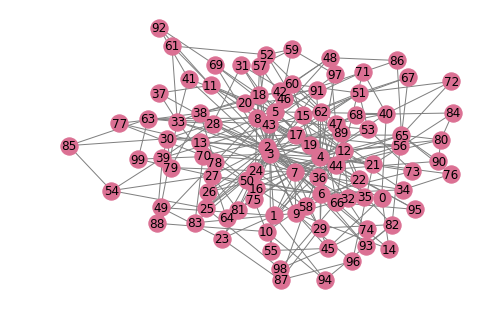

In [2]:
N = 100; # number of nodes
m = 3;
G = nx.barabasi_albert_graph(N,m,seed=None); # Barabasi-Albert graph

# n = 4
# G = nx.gnm_random_graph(n, m) # Erdos-Renyi graph

A = nx.to_numpy_matrix(G); # creates adjacency matrix

w = np.random.uniform(0, 2, int(N/2))
w = np.concatenate((w,-w)) # defines natural frequencies
K = .5 # coupling constant
alpha = 1 # SL parameter

F = np.zeros(N)
for i in range(int(N/5)):
    F[5*i] = 1
Omega = np.pi

# initial conditions
theta0 = np.random.uniform(0, 2*np.pi, N)

nx.draw(G, node_color='palevioletred', edge_color='grey', with_labels=True)
plt.show()

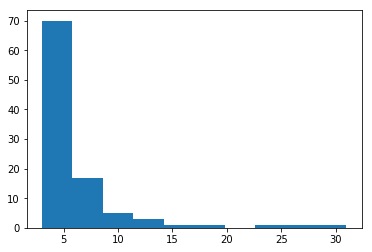

In [3]:
plt.hist(list(dict(nx.degree(G)).values()))
plt.show()

### Save and calculate the time evolution of both forced and free versions of the network

In [4]:
kur_forced = KuramotoNetwork(w, A, K, F, Omega, rot_frame=True)
kur_free = KuramotoNetwork(w, A, K)

In [5]:
%%time
t = np.arange(0,50,.2)
phi, _ = kur_forced.integrate(theta0, t)
theta, _ = kur_free.integrate(theta0, t)

CPU times: user 19.5 s, sys: 80 ms, total: 19.5 s
Wall time: 20.2 s


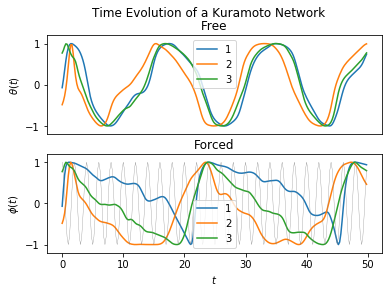

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1)

fig.suptitle('Time Evolution of a Kuramoto Network')

ax1.set_title('Free')
ax1.set_ylabel(r'$\theta(t)$')
ax1.set_ylim([-1.2, 1.2])
ax1.set_xticks([])

for osc in range(3):
    ax1.plot(t, np.cos(theta[osc]), label=osc+1)
ax1.legend()

ax2.set_title('Forced')
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$\phi(t)$')
ax2.set_ylim([-1.2, 1.2])

for osc in range(3):
    ax2.plot(t, np.cos(phi[osc]), label=osc+1)
ax2.plot(t, F[5]*np.cos(Omega*t), color='grey', linewidth='.3')
ax2.legend()

plt.show()

## Order Parameter

$$ \mathrm{z}(t) = r(t) e^{i \psi(t)} = \frac{1}{N} \sum_{j=1}^N e^{i \theta_j(t)} $$

$$ \langle r \rangle = \frac{1}{\Delta t} \int_{t_0}^{t_0+\Delta t} r(t) dt $$

### Order parameter as a function of the coupling

In [7]:
%%time
sync_par1 = OrderParameter(kur_free, theta0, 40, 45, 0.1, Kf=3, dt=.5)
sync_par2 = OrderParameter(kur_forced, theta0, 40, 45, 0.1, Kf=3, dt=.5)

CPU times: user 27min 11s, sys: 23.4 s, total: 27min 35s
Wall time: 16min 1s


In [8]:
# Free system
K1 = sync_par1['K']
r1 = sync_par1['r']
r_std1 = sync_par1['r_std']
psidot1 = sync_par1['psidot']
psidot_std1 = sync_par1['psidot_std']

# Forced system
K2 = sync_par2['K']
r2 = sync_par2['r']
r_std2 = sync_par2['r_std']
psidot2 = sync_par2['psidot']
psidot_std2 = sync_par2['psidot_std']

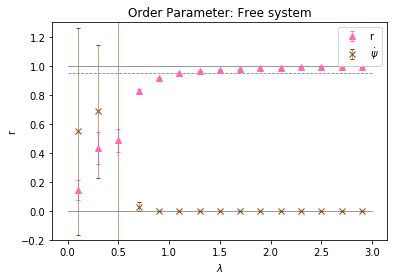

In [9]:
fig, ax1 = plt.subplots(1, 1)

ax1.set_title("Order Parameter: Free system")
ax1.set_ylabel("r")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylim(-.2,1.3)

ax1.errorbar(K1 ,r1, yerr=r_std1, marker='^', color = 'hotpink', fmt='o', elinewidth=.5, \
             capsize=2, label='r')
ax1.errorbar(K1 ,psidot1, yerr=psidot_std1, marker='x', color = 'saddlebrown', fmt='o', \
             elinewidth=.5, capsize=2, label=r'$\dot{\psi}$')

ax1.plot([0, 3], [1, 1], linewidth = .8, color = 'grey')
ax1.plot([0, 3], [0, 0], linewidth = .8, color = 'grey')
ax1.plot([0, 3], [.95, .95], linewidth = .8, color = 'grey', linestyle='--')

ax1.legend()
plt.show()

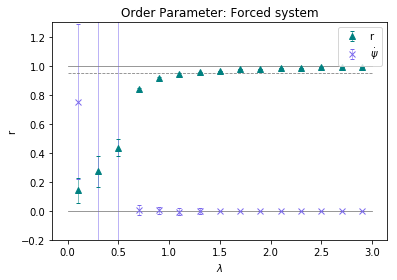

In [10]:
fig, ax2 = plt.subplots(1, 1)

ax2.set_title("Order Parameter: Forced system")
ax2.set_ylabel("r")
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylim(-.2,1.3)

ax2.errorbar(K2 ,r2, yerr=r_std2, marker='^', color = 'teal', fmt='o', elinewidth=.5, \
             capsize=2, label='r')
ax2.errorbar(K2 ,psidot2, yerr=psidot_std2, marker='x', color = 'mediumslateblue', fmt='o', \
             elinewidth=.5, capsize=2, label=r'$\dot{\psi}$')

ax2.plot([0, 3], [1, 1], linewidth = .8, color = 'grey')
ax2.plot([0, 3], [0, 0], linewidth = .8, color = 'grey')
ax2.plot([0, 3], [.95, .95], linewidth = .8, color = 'grey', linestyle='--')

ax2.legend()
plt.show()

## Smallest coupling for full synchronization

We define $\lambda_f$ as the smallest value of $\lambda$ for which the system achieves global synchhrnization with the driving force, i.e. $r>r_f$ and $|\dot{\psi}|<\epsilon$ (usually $r_f=0.95$, $\dot{\psi}_f = 10^{-2}$) .In practice, we also restrict the standard deviations of such parameters, i.e., $\sigma_r < \epsilon_r$ and $\sigma_{\dot{\psi}} < \dot{\psi}_f$. It's worth noticing that the algorithm allows one to give the estimated interval $[\lambda_0, \lambda_0+step]$ on which the result is expected to be as could be guessed by the $r \times \lambda$ plot.

In [11]:
%%time
Kf, full_sync, History = FullSyncCoupling(kur_free, 1.2, 40, 45, dt=.5, max_iter=10, step0=.4)
Kf

CPU times: user 5min, sys: 4.42 s, total: 5min 4s
Wall time: 25min 51s


In [12]:
full_sync

{'Kf': 1.1062500000000002,
 'iterations': 10,
 'psidot_stdf': 3.973045159042054e-11,
 'psidotf': -2.244568481696913e-10,
 'r_stdf': 2.7645663536191023e-12,
 'rf': 0.9498145424954968}

In [13]:
History

{'Kf_hist': [1.2,
  1.0,
  1.1,
  1.2000000000000002,
  1.1500000000000001,
  1.1,
  1.125,
  1.1125,
  1.1,
  1.1062500000000002],
 'N0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'psidot_stdf_hist': [2.5959160688779617e-09,
  2.303657533119911e-09,
  1.8544442355155567e-09,
  3.1783901777781484e-09,
  3.5247526763392367e-09,
  1.8544442355155567e-09,
  3.17019173400104e-09,
  4.123658334274176e-09,
  1.8544442355155567e-09,
  3.973045159042054e-11],
 'psidotf_hist': [2.9738540519019807e-09,
  2.323293458851418e-09,
  1.7692894063417144e-10,
  1.3630925524113182e-09,
  7.944270426681518e-10,
  1.7692894063417144e-10,
  1.181762440991305e-09,
  9.431467952304552e-13,
  1.7692894063417144e-10,
  -2.244568481696913e-10],
 'r_stdf_hist': [4.842881651256903e-11,
  6.272549146757456e-11,
  5.217137832858043e-11,
  5.361677768433992e-11,
  7.90000287409498e-11,
  5.217137832858043e-11,
  4.7699622029995226e-11,
  1.1704215374663818e-10,
  5.217137832858043e-11,
  2.7645663536191023e-12],
 'rf_hist': 

## Critical fraction

We define the critical fraction $f_{crit}$ as the smallest fraction of the total number of oscillators connected to the driving force $F$ for which the system is able to globally synchronize with the force.

In [14]:
fcrit, critf_par, History = CriticalFraction(kur_forced, F=100, K=1, f0=.1, t0=40, tf=45, step0=.2)
fcrit

1.0

In [15]:
critf_par

{'fcrit': 1.0,
 'iterations': 7,
 'nf': 100,
 'psidot_stdf': 0.029731254379027943,
 'psidotf': 0.0036431184731350688,
 'r_stdf': 0.0070135690517153515,
 'rf': 0.9376225668694597}

In [16]:
History

{'N0': [1, 1, 1, 1, 1, 1, 1],
 'nf': [10, 30, 50, 70, 90, 100, 100],
 'psidot_stdf_hist': [0.027915455589026306,
  0.02317460402321346,
  0.027796585649730247,
  0.02886964905206528,
  0.028992064144643857,
  0.029731254379027943,
  0.029731254379027943],
 'psidotf_hist': [-0.004573440838492305,
  0.006637617671172226,
  -3.429366752795349e-05,
  0.0026466837915257568,
  -0.0013877303076567247,
  0.0036431184731350688,
  0.0036431184731350688],
 'r_stdf_hist': [0.006516508835645696,
  0.007405881608136711,
  0.0063546900655374605,
  0.006521961412692123,
  0.006430317355387349,
  0.0070135690517153515,
  0.0070135690517153515],
 'rf_hist': [0.9324887997143492,
  0.9315991259466451,
  0.9316763290293363,
  0.9301787702768284,
  0.937659228528777,
  0.9376225668694597,
  0.9376225668694597],
 'step_hist': [20, 20, 20, 20, 20, 10, 0]}

## Order parameter as a function of the force

In [17]:
%%time
forced_par = ForcedOrderParameter(kur_forced, 1, .2, 40, 45, F0=0, Ff=3, dF=.2)

CPU times: user 5min 17s, sys: 747 ms, total: 5min 18s
Wall time: 5min 20s


In [18]:
forced_par

{'F': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8]),
 'psi': array([-1.18615324, -1.09767533, -2.01899076,  2.92662488,  0.13794936,
        -0.30512484, -1.81285722, -0.17147063, -2.84095752,  1.03596149,
        -1.02579864, -0.64422087, -1.20507738, -0.84892599, -0.96206842]),
 'psi_std': array([0.00947782, 0.00955152, 0.01221963, 0.00755014, 0.01431633,
        0.0082669 , 0.03039178, 0.00914033, 0.03449069, 0.04406979,
        0.0277483 , 0.01501096, 0.03672782, 0.02555277, 0.03160569]),
 'psidot': array([-0.00341704,  0.0006226 ,  0.0048528 , -0.00252656, -0.00407937,
        -0.00235879,  0.01975423, -0.00496246,  0.02678706, -0.03191697,
         0.01614197,  0.00729262,  0.02507601,  0.02008524,  0.01894197]),
 'psidot_std': array([0.02739327, 0.02689022, 0.02219496, 0.02208731, 0.02923059,
        0.02504661, 0.02277769, 0.02391113, 0.03013949, 0.02619005,
        0.02833   , 0.0248304 , 0.0259686 , 0.02915124, 0.02832771]),
 'r': 

In [19]:
F = forced_par['F']
r = forced_par['r']
r_std = forced_par['r_std']
psi = forced_par['psi']
psi_std = forced_par['psi_std']
psidot = forced_par['psidot']
psidot_std = forced_par['psidot_std']

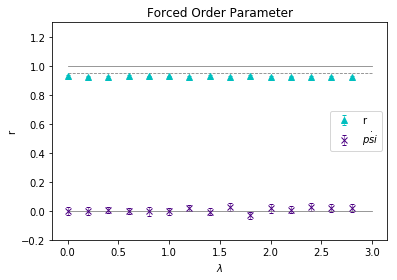

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.set_title("Forced Order Parameter")
ax1.set_ylabel("r")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylim(-.2,1.3)

ax1.errorbar(F ,r, yerr=r_std, marker='^', color = 'c', fmt='o', elinewidth=.5, \
             capsize=2, label='r')
ax1.errorbar(F ,psidot, yerr=psidot_std, marker='x', color = 'indigo', fmt='o', \
             elinewidth=.5, capsize=2, label=r'$\dot{psi}$')

ax1.plot([0, 3], [1, 1], linewidth = .8, color = 'grey')
ax1.plot([0, 3], [0, 0], linewidth = .8, color = 'grey')
ax1.plot([0, 3], [.95, .95], linewidth = .8, color = 'grey', linestyle='--')

ax1.legend()
plt.show()

## Critical force

In [29]:
%%time
F, forced_par, History = CriticalForce(kur_forced, 1, .2, 1, 40, 45, step0=.5)
F

CPU times: user 13min, sys: 6.32 s, total: 13min 7s
Wall time: 14min 49s


In [30]:
forced_par

{'F': 15.5,
 'iterations': 30,
 'psidot_stdf': 0.025311725801928208,
 'psidotf': -0.02569375768580833,
 'r_stdf': 0.006119448417528206,
 'rf': 0.9246228310213308}

In [31]:
History

{'F_hist': [1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0,
  12.5,
  13.0,
  13.5,
  14.0,
  14.5,
  15.0,
  15.5],
 'N0': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'psidot_stdf_hist': [0.02278987402807322,
  0.023227586554702737,
  0.026528333234533144,
  0.02992023960673468,
  0.027570990977737804,
  0.0281261455523224,
  0.027776081434022746,
  0.02355856233098677,
  0.02255091712441428,
  0.02326970657787656,
  0.024812504193715876,
  0.022402499802939086,
  0.022162505707330055,
  0.027302908620425337,
  0.02385142896371155,
  0.022880726710055376,
  0.02560999910507896,
  0.022029527280496022,
  0.022963456451908115,
  0.024645618982986336,
  0.023971428267791445,
  0.0231058198391791,
  0.029080514832142395,
  0.03001375245460819,
  0.029448373745876,
  0.0